# Projeto 1 - Manipulação de imagens para a acessibilidade de daltônicos\
### Dupla: Iago Mendes e Jorge Augusto

Esse projeto tem como objetivo a simulação das condições visuais de Protanopia e Deuteranopia através da metodologia de manipulação de imagens presente no artigo “Digital Video Colourmaps for Checking the Legibility of Displays by Dichromats”.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

Primeiramente, foram obtidas três imagens, uma normal e as outras duas que foram previamente manipuladas para simular a Protanopia e a Deuteranopia.
Fonte:https://brasil.elpais.com/brasil/2017/10/08/cultura/1507468141_020732.html

In [2]:
img1_bgr = cv2.imread('pepper_normal.jpg')
img2_bgr = cv2.imread('pepper_protanopia.jpg')
img3_bgr = cv2.imread('pepper_deuteranopia.jpg')

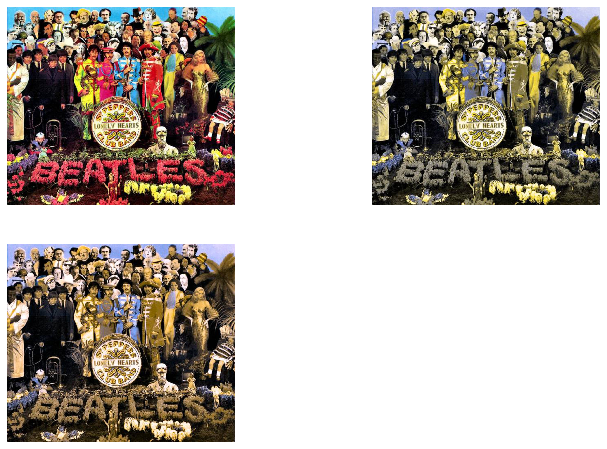

In [3]:
img1 = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3_bgr, cv2.COLOR_BGR2RGB)

WIDTH = 6
HEIGHT = 4
NCOLS = 2

# função que permite a plotagem de múltiplas imagens em uma célula, facilitando sua comparação
def show_images(imgs, width=WIDTH, height=HEIGHT, ncols=NCOLS):
    nrows = (len(imgs) + 1) // ncols
    
    plt.figure(figsize=(ncols*width, nrows*height))
    for idx, img in enumerate(imgs):
        plt.subplot(nrows, ncols, idx+1)
        plt.imshow(img, vmin=0, vmax=255)
        plt.axis('off')
    plt.show()

show_images([img1, img2, img3])

Acima estão a imagem normal, a com protanopia e a com deuteranopia, respectivamente.

A seguir, são calculadas as quantidades fotométricas relativas da imagem para cada canal de cor (R,G,B). Logo em seguida, é feito um cálculo para adequar os valores de R, G e B à gama de cores do monitor. O artigo utiliza a notação R2, G2 e B2 para representar esse ajuste.

In [4]:
img1_p = img1.copy() # Protanopia
img1_d = img1.copy() # Deuteranopia

img1_p = (img1_p/255.0)**2.2
img1_d = (img1_d/255.0)**2.2
img1_p = img1_p*0.992052 + 0.003974
img1_d = img1_d*0.957237 + 0.0213814

Em seguida, os valores de R2, G2 e B2 são transformados para o espectro LMS, que se refere à sensibilidade dos cones ópticos à comprimentos de onda longos (L), médios (M) e pequenos (S). Isso é feito através de uma multiplicação de uma matriz de constantes 3x3 pela matriz 3x1 de R2, G2 e B2.

In [5]:
copy_p = img1_p.copy()
copy_d = img1_d.copy()


img1_p[:, :, 0] = 17.8824*copy_p[:, :, 0] + 43.5161*copy_p[:, :, 1] + 4.11935*copy_p[:, :, 2]
img1_p[:, :, 1] = 3.45565*copy_p[:, :, 0] + 27.1554*copy_p[:, :, 1] + 3.86714*copy_p[:, :, 2]
img1_p[:, :, 2] = 0.0299566*copy_p[:, :, 0] + 0.184309*copy_p[:, :, 1] + 1.46709*copy_p[:, :, 2]

img1_d[:, :, 0] = 17.8824*copy_d[:, :, 0] + 43.5161*copy_d[:, :, 1] + 4.11935*copy_d[:, :, 2]
img1_d[:, :, 1] = 3.45565*copy_d[:, :, 0] + 27.1554*copy_d[:, :, 1] + 3.86714*copy_d[:, :, 2]
img1_d[:, :, 2] = 0.0299566*copy_d[:, :, 0] + 0.184309*copy_d[:, :, 1] + 1.46709*copy_d[:, :, 2]

Então, o artigo menciona uma outra multiplicação matricial necessária, cujos coeficientes são específicos para cada tipo de daltonismo. Assim, os valores de Lp, Mp, Sp, Ld, Md e Sd são obtidos para o caso da protanopia e da deuteranopia, respectivamente.

In [6]:
img1_p[:, :, 0] = 2.02344*img1_p[:, :, 1] - 2.52581*img1_p[:, :, 2] # Prontanopia

img1_d[:, :, 1] = 0.494207*img1_d[:, :, 0] + 1.24827*img1_d[:, :, 2] # Deuternopia

Agora, para exibir a imagem modificada corretamente, é necessária sua transformação de volta ao espectro RGB. Para isso, é feita uma última multiplicação de matrizes, agora com a transposta da utilizada na obtenção dos valores LMS, além de desfazer o passo das quantidades fotométricas.

In [7]:
# RpGpBp

copy_p2 = img1_p.copy()
img1_p[:, :, 0] = 0.080944*copy_p2[:, :, 0] - 0.130504*copy_p2[:, :, 1] + 0.116721*copy_p2[:, :, 2]
img1_p[:, :, 1] = -0.0102485*copy_p2[:, :, 0] + 0.0540194*copy_p2[:, :, 1] - 0.113615*copy_p2[:, :, 2]
img1_p[:, :, 2] = -0.000365294*copy_p2[:, :, 0] - 0.00412163*copy_p2[:, :, 1] + 0.693513*copy_p2[:, :, 2]

img1_p = (255.0*img1_p**(1/2.2)).astype('int')


copy_d2 = img1_d.copy()
img1_d[:, :, 0] = 0.080944*copy_d2[:, :, 0] - 0.130504*copy_d2[:, :, 1] + 0.116721*copy_d2[:, :, 2]
img1_d[:, :, 1] = -0.0102485*copy_d2[:, :, 0] + 0.0540194*copy_d2[:, :, 1] - 0.113615*copy_d2[:, :, 2]
img1_d[:, :, 2] = -0.000365294*copy_d2[:, :, 0] - 0.00412163*copy_d2[:, :, 1] + 0.693513*copy_d2[:, :, 2]

img1_d = (255.0*img1_d**(1/2.2)).astype('int')

Finalmente, as imgens manipuladas pela dupla são dispostas na coluna da direita, ao lado de sua respectiva imagem original, sendo a primeira linha referente à protanopia e a segunda referente à deuteranopia.

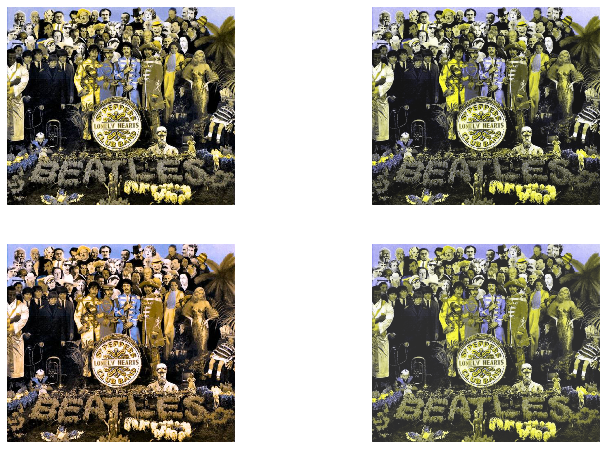

In [8]:
show_images([img2, img1_p, img3, img1_d])

Por fim, para justificar a diferença dos resultados quando comparados com as imagens originais, deve-se considerar que existem diversos métodos de simular o daltonismo através da manipulação de imagens. Até é possível que o mesmo método do artigo tenha sido utilizado na confecção das imagens originais, porém, qualquer alteração, por menor que seja, de alguma das constantes pode resultar em grandes diferenças no produto final.
Com isso em mente, a dupla optou por tomar mais um passo e validar os resultados com pessoas portadoras das condições visuais discutidas no trabalho. O feedback desses testes foi positivo a ponto de assegurar o grupo de que os resultados são válidos e possivelmente aplicáveis à aplicações reais como opções de modos daltônicos em jogos de computador, ou até mesmo opções de configuração de vídeo para televisões e monitores, diminuindo a barreira de dificuldade visual imposta àqueles que portam essas doenças.